# Imports

In [97]:
from my_import import *

path = kagglehub.dataset_download("svanoo/myanimelist-dataset")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\User\.cache\kagglehub\datasets\svanoo\myanimelist-dataset\versions\2


# Dataset analysis and cleaning

In [98]:
#Collumns that we are interested in
cols_to_use = ['anime_id', 'title', 'synopsis', 'genres' , 'score']
#Read the file while only taking certain collumns
full_df=pd.read_csv(r"C:\Users\User\.cache\kagglehub\datasets\svanoo\myanimelist-dataset\versions\2\anime.csv",
               sep='\t',
               usecols=cols_to_use)
print("Original Dataset")
print("Shape of the Dataset:",full_df.shape)
#Display fiest five columns of the dataset
display(full_df)


Original Dataset
Shape of the Dataset: (13379, 5)


,anime_id,title,synopsis,genres,score
0,2366,Touma Kishinden Oni,Shuramaru is hated and feared by the villagers...,Supernatural,NaN
1,4940,Sabaku no Kaizoku! Captain Kuppa,"Sometime in the future, the world was complete...",Action|Adventure,NaN
2,50285,On Air Dekinai!,"Set in 2014, the anime follows the adventures ...",Comedy,NaN
3,3975,Uchi no 3 Shimai,The daily life of the Motsumoto family. The th...,Comedy|Slice of Life,NaN
4,36036,Running Man,"The Soul Tree, the great source of our race. ...",Action|Adventure|Kids,NaN
...,...,...,...,...,...
13374,32188,Steins;Gate: Kyoukaimenjou no Missing Link - D...,"Having reached his emotional breaking point, R...",Sci-Fi|Suspense,8.24
13375,31324,Grisaia no Meikyuu: Caprice no Mayu 0 - Takizo...,Special bundled with the Blu-ray/DVD volume of .,Ecchi,7.27
13376,31283,Bikini Warriors Special,"According to the official Hobby Japan website,...",Comedy|Fantasy|Ecchi|Parody,5.36
13377,33142,Re:Zero kara Hajimeru Break Time,A series of comedic shorts featuring chibi ver...,Adventure|Comedy|Fantasy|Parody,6.66


In [99]:
#Finds rows with missing synopsis
missing_synopsis = full_df[full_df['synopsis'].isnull() | (full_df['synopsis'] == ".")]
print("Finding rows with missing synopsis")
display(missing_synopsis)
print("Number of missing synopsis:",len(missing_synopsis))

#Removes the rows with missing synopsis
df_cleaned = full_df[~(full_df['synopsis'].isnull() | (full_df['synopsis'] == "."))]
print("Cleaned df")
display(df_cleaned)

#Find incomplete synopsis 



Finding rows with missing synopsis


,anime_id,title,synopsis,genres,score
6,49065,Shuimu Xuetang 2nd Season,.,Comedy|Kids,NaN
7,48335,Canimals,.,Comedy|Kids,NaN
18,51119,Grisaia: Phantom Trigger the Animation (TV),.,Action|School,NaN
19,34928,Akindo Sei no Little Peso,.,Comedy|Sci-Fi,NaN
21,45596,Kindan Joshi,.,Comedy|Romance,NaN
...,...,...,...,...,...
12681,9563,Hidamari Sketch x ☆☆☆ Specials,.,Comedy|Slice of Life|School|Seinen,7.82
12694,38154,3-gatsu no Lion: Ugoku! Nya Shogi,.,Game,6.06
12802,30533,Gundam Build Fighters Try: Island Wars,.,Action|Sci-Fi|Mecha,6.77
12889,38810,Bleach: Gotei 13 Omake,.,Action|Adventure,6.56


Number of missing synopsis: 864
Cleaned df


,anime_id,title,synopsis,genres,score
0,2366,Touma Kishinden Oni,Shuramaru is hated and feared by the villagers...,Supernatural,NaN
1,4940,Sabaku no Kaizoku! Captain Kuppa,"Sometime in the future, the world was complete...",Action|Adventure,NaN
2,50285,On Air Dekinai!,"Set in 2014, the anime follows the adventures ...",Comedy,NaN
3,3975,Uchi no 3 Shimai,The daily life of the Motsumoto family. The th...,Comedy|Slice of Life,NaN
4,36036,Running Man,"The Soul Tree, the great source of our race. ...",Action|Adventure|Kids,NaN
...,...,...,...,...,...
13374,32188,Steins;Gate: Kyoukaimenjou no Missing Link - D...,"Having reached his emotional breaking point, R...",Sci-Fi|Suspense,8.24
13375,31324,Grisaia no Meikyuu: Caprice no Mayu 0 - Takizo...,Special bundled with the Blu-ray/DVD volume of .,Ecchi,7.27
13376,31283,Bikini Warriors Special,"According to the official Hobby Japan website,...",Comedy|Fantasy|Ecchi|Parody,5.36
13377,33142,Re:Zero kara Hajimeru Break Time,A series of comedic shorts featuring chibi ver...,Adventure|Comedy|Fantasy|Parody,6.66


In [100]:
def clean_synopsis(text):
    if pd.isna(text):
        return text
    # Remove phrases like "(Source: Official Site)" or "(Source: ANN)"
    return re.sub(r"\(source:.*?\)", "", text, flags=re.IGNORECASE).strip()

df_cleaned['synopsis'] = df_cleaned['synopsis'].apply(clean_synopsis)
display(df_cleaned)

C:\Users\User\AppData\Local\Temp\ipykernel_3296\3259536717.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['synopsis'] = df_cleaned['synopsis'].apply(clean_synopsis)


,anime_id,title,synopsis,genres,score
0,2366,Touma Kishinden Oni,Shuramaru is hated and feared by the villagers...,Supernatural,NaN
1,4940,Sabaku no Kaizoku! Captain Kuppa,"Sometime in the future, the world was complete...",Action|Adventure,NaN
2,50285,On Air Dekinai!,"Set in 2014, the anime follows the adventures ...",Comedy,NaN
3,3975,Uchi no 3 Shimai,The daily life of the Motsumoto family. The th...,Comedy|Slice of Life,NaN
4,36036,Running Man,"The Soul Tree, the great source of our race. ...",Action|Adventure|Kids,NaN
...,...,...,...,...,...
13374,32188,Steins;Gate: Kyoukaimenjou no Missing Link - D...,"Having reached his emotional breaking point, R...",Sci-Fi|Suspense,8.24
13375,31324,Grisaia no Meikyuu: Caprice no Mayu 0 - Takizo...,Special bundled with the Blu-ray/DVD volume of .,Ecchi,7.27
13376,31283,Bikini Warriors Special,"According to the official Hobby Japan website,...",Comedy|Fantasy|Ecchi|Parody,5.36
13377,33142,Re:Zero kara Hajimeru Break Time,A series of comedic shorts featuring chibi ver...,Adventure|Comedy|Fantasy|Parody,6.66


In [ ]:
# text = "The second season of . SBS took over broadcasting the show. The art style has been changed for a more modern anime-esque appearance and some voice actors did not reprise their character's roles."
# text = text.lower()

# # Keywords often found in promotional or non-plot synopses
# junk_patterns = [
#     r"\bdvd\b", r"\bblu[- ]?ray\b", r"\bova\b", r"\bbundle\b", r"\bbonus\b",
#     r"\bvolume\b", r"\badaptation\b", r"\bpreview\b",
#     r"original (video|animation|anime|episode)", r"bundled.*volume", r"re[- ]?release",r"\bbased\b",r"\bpromote\b",r"\brecap\b",
#     r"\bshort\b", r"\bseason of\b"
# ]
# if not is_informative_synopsis(text):
#     print("FILTERED:", text)
#     for pattern in junk_patterns:
#         if re.search(pattern, text.lower()):
#             print(f"Matched pattern: {pattern}")


In [101]:
def is_informative_synopsis(text, min_word_count=10):
    if pd.isna(text):
        return False

    text = text.strip().lower()
    word_count = len(text.split())

    # If it's short and has promotional terms → discard
    if word_count < min_word_count:
        return False

    # If long enough, ignore occasional junk terms
    junk_patterns = [
        r"\bdvd\b", r"\bblu[- ]?ray\b", r"\bova\b", r"\bbundle\b", r"\bbonus\b",
        r"\bvolume\b", r"\badaptation\b", r"\bpreview\b",
        r"original (video|animation|anime|episode)", r"bundled.*volume", r"re[- ]?release",r"\bbased\b",r"\bpromote\b",r"\brecap\b",
        r"\bshort\b", r"season of", r"sequel",r"continuation",r"specials",r"promotional",r"collaboration",r"second part",r"web anime",r"mini anime",
        r"promotion video",r"animation",r"summary",r"shorts",r"blu-ray",r"special episodes",r"dvds"
    ]

    junk_hits = sum(bool(re.search(p, text)) for p in junk_patterns)

    # If many junk terms, and synopsis is still short → reject
    if junk_hits > 0 and word_count <30:
        return False

    return True


filtered_out = df_cleaned[~df_cleaned['synopsis'].apply(is_informative_synopsis)]
print(f"Removed {len(filtered_out)} uninformative entries.")
filtered_out.loc[:,'synopsis_word_count'] = filtered_out['synopsis'].apply(lambda x: len(x.split()))
display(filtered_out.sort_values(by="synopsis_word_count", ascending=True))

filtered_out.to_csv("filter_words.csv")

print("Remaining rows")
df_cleaned=df_cleaned[df_cleaned['synopsis'].apply(is_informative_synopsis)]
df_cleaned.loc[:,'synopsis_word_count'] = df_cleaned['synopsis'].apply(lambda x: len(x.split()))
display(df_cleaned.sort_values(by="synopsis_word_count", ascending=True))


Removed 2732 uninformative entries.


C:\Users\User\AppData\Local\Temp\ipykernel_3296\3241014334.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_out.loc[:,'synopsis_word_count'] = filtered_out['synopsis'].apply(lambda x: len(x.split()))


,anime_id,title,synopsis,genres,score,synopsis_word_count
12106,8022,Tegamibachi Gakuen,specials.,Comedy|School,7.32,1
10506,39764,Detective Conan Movie 24: The Scarlet Bullet,24th Movie.,Action|Comedy|Drama|Mystery|Police|Shounen,7.81,2
9474,48896,Overlord Movie 3: Sei Oukoku-hen,New film.,Action|Fantasy|Supernatural|Game,NaN,2
4614,32666,Oniku Daisuki! Zeushi-kun: Suteki na Hamburger,New episode.,Comedy|Gourmet,NaN,2
13017,16508,Ebiten: Kouritsu Ebisugawa Koukou Tenmonbu Spe...,BD/DVD specials.,Comedy|Ecchi|Parody|School|Shounen,5.95,2
...,...,...,...,...,...,...
5519,39264,Da Yu Hai Tang,"In 2004, Liang Xuan produced a flash short fil...",Adventure|Drama|Romance|Supernatural,6.20,29
12132,32065,Kimi no Sumu Machi,Original short animation that aired as part of...,Comedy,6.00,29
13336,5347,Bible Black: Imari Ryoujoku Genba,The Imari SP shows Imari being raped when she ...,Hentai,6.54,29
5095,35453,Tobidase!! Buddy-kun,Parody shorts of released only on CoroCoro Com...,Game|Parody,NaN,29


Remaining rows


,anime_id,title,synopsis,genres,score,synopsis_word_count
6021,33905,Hatsune Miku: Hiyashite Narasou Okashi no Ii Oto,Hatsune Miku teaches viewers how to eat Pocky ...,Music,5.94,10
12235,10471,Ie Naki Ko Remy Specials,Three unaired episodes that conclude Ie Naki K...,Adventure|Drama,7.57,10
10081,21255,Takarajima (Movie),A 88-minute theatrical recut of the original T...,Adventure|Drama|Mystery|Supernatural|Historical,6.47,10
10021,20441,Meitantei Holmes: Mrs. Hudson Hitojichi Jiken ...,The second movie featuring two episodes from t...,Adventure|Comedy|Mystery,6.72,10
9867,34528,Mukashi Mukashi Momotarou,A stop-motion film about the classic Japanese ...,Fantasy|Demons|Historical,NaN,10
...,...,...,...,...,...,...
990,2552,Tetsuko no Tabi,Based on a seinen manga by Kikuchi Naoe and Yo...,Comedy|Slice of Life|Seinen,6.25,388
10886,37897,Godzilla 3: Hoshi wo Kuu Mono,"A door opens, and a golden seal shatters a sta...",Action|Adventure|Sci-Fi,6.22,394
10609,5090,Techno Police 21C,The plot consists of a chase of a hijacked MBT...,Action|Sci-Fi|Mecha|Police,5.21,466
1264,1371,Hi no Tori,"From prehistoric times to the distant future, ...",Adventure|Drama|Sci-Fi|Supernatural|Historical,7.12,474


In [102]:
df_cleaned.loc[:,'synopsis_word_count'] = df_cleaned['synopsis'].apply(lambda x: len(x.split()))
display(df_cleaned)
df_cleaned.to_csv("see_remaining_after word filter.csv")

,anime_id,title,synopsis,genres,score,synopsis_word_count
0,2366,Touma Kishinden Oni,Shuramaru is hated and feared by the villagers...,Supernatural,NaN,20
1,4940,Sabaku no Kaizoku! Captain Kuppa,"Sometime in the future, the world was complete...",Action|Adventure,NaN,46
2,50285,On Air Dekinai!,"Set in 2014, the anime follows the adventures ...",Comedy,NaN,82
3,3975,Uchi no 3 Shimai,The daily life of the Motsumoto family. The th...,Comedy|Slice of Life,NaN,35
4,36036,Running Man,"The Soul Tree, the great source of our race. ...",Action|Adventure|Kids,NaN,103
...,...,...,...,...,...,...
13366,23479,Itadaki! Seieki♥ Special,Having found a beautiful partner that is well-...,Hentai,7.19,80
13368,36275,Natsume Yuujinchou Roku Specials,"On a hot summer day, Takashi Natsume and his f...",Drama|Slice of Life|Supernatural|Demons|Shoujo,8.32,181
13372,2951,Gintama: Nanigoto mo Saiyo ga Kanjin nano de T...,"Due to the arrival of aliens called the ""Amant...",Action|Comedy|Sci-Fi|Historical|Mecha|Parody|S...,8.04,150
13373,2248,Naruto: Dai Katsugeki!! Yuki Hime Shinobu Houj...,The Konohagakure Grand Sports Festival has beg...,Action|Comedy|Fantasy|Sports|Martial Arts|Shounen,6.90,69


In [ ]:

# # Compute number of words for each synopsis and add in another collumn
# df_cleaned.loc[:,'synopsis_word_count'] = df_cleaned['synopsis'].apply(lambda x: len(x.split()))
# display(df_cleaned)
# min_words=25
# print("Minimum number of words in a synopsis:",min_words)


# short_synopsis = df_cleaned[df_cleaned['synopsis_word_count'] < min_words]

# display(short_synopsis[['title', 'synopsis', 'synopsis_word_count']])

# short_synopsis.to_csv("test.csv")

# #IMPORTANT NOTE: Removing rows based on word count may remove some meaningful synopsis.
# #This problem can be solved if the model takes the anime title as the input and classifies the prompt from user based on synopsis and also anime titles
# #This removes the need of data cleaning due to incomplete synopsis
# #But for now, we remove every synopsis below 8 words

# print("Cleaned df")
# df_cleaned = df_cleaned[df_cleaned['synopsis_word_count'] >= min_words]
# display(df_cleaned)


In [103]:
final_cleaned_dataset_df=df_cleaned[['title', 'synopsis', 'genres']]
# Split genres into lists
final_cleaned_dataset_df['genres'] = final_cleaned_dataset_df['genres'].apply(lambda x: x.split('|'))
# #Remove Hentai and Ecchi
# final_cleaned_dataset_df = final_cleaned_dataset_df[~final_cleaned_dataset_df['genres'].apply(lambda g: 'Ecchi' in g or 'Hentai' in g)]

def filter_hentai_ecchi(genre_list):
    banned_genres = {"Hentai", "Ecchi"}
    return [genre for genre in genre_list if genre not in banned_genres]
# Apply filter
final_cleaned_dataset_df['genres'] = final_cleaned_dataset_df['genres'].apply(filter_hentai_ecchi)
display(final_cleaned_dataset_df[final_cleaned_dataset_df['genres'].map(len) < 1])
# Drop rows with empty genre lists
final_cleaned_dataset_df = final_cleaned_dataset_df[final_cleaned_dataset_df['genres'].map(len) > 0]


display(final_cleaned_dataset_df)

C:\Users\User\AppData\Local\Temp\ipykernel_3296\1364294765.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_cleaned_dataset_df['genres'] = final_cleaned_dataset_df['genres'].apply(lambda x: x.split('|'))
C:\Users\User\AppData\Local\Temp\ipykernel_3296\1364294765.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_cleaned_dataset_df['genres'] = final_cleaned_dataset_df['genres'].apply(filter_hentai_ecchi)


,title,synopsis,genres
4936,"Sazanami Souji ni Shojo wo Sasagu: Saa, Jikkur...","""If it's a request from my precious wife, then...",[]
5522,Takarasagashi no Natsuyasumi,"The story takes place in rural Japan, during a...",[]
5804,Meijyou,"One day, a beautiful girl at school, Otsuki Ro...",[]
5852,Lilitales,As a newly appointed knight of the royal famil...,[]
5884,Kunoichi Botan,"One night in a merchant's mansion, a kunoichi ...",[]
...,...,...,...
10895,Yasuji no Pornorama: Yacchimae!!,Based on the manga by Tanioka Yasuji. Japanes...,[]
12455,Kyouhaku: Owaranai Ashita - Special Stage,Events of the original 3 episodes are being re...,[]
13190,Rance 01: Hikari wo Motomete The Animation - L...,"As a student of the prestigious Paris Academy,...",[]
13294,One Room Second Season Special,special included on the BD release of the main...,[]


,title,synopsis,genres
0,Touma Kishinden Oni,Shuramaru is hated and feared by the villagers...,[Supernatural]
1,Sabaku no Kaizoku! Captain Kuppa,"Sometime in the future, the world was complete...","[Action, Adventure]"
2,On Air Dekinai!,"Set in 2014, the anime follows the adventures ...",[Comedy]
3,Uchi no 3 Shimai,The daily life of the Motsumoto family. The th...,"[Comedy, Slice of Life]"
4,Running Man,"The Soul Tree, the great source of our race. ...","[Action, Adventure, Kids]"
...,...,...,...
13363,Zero no Tsukaima: Princesses no Rondo Picture ...,Picture Drama episodes included in each DVD vo...,"[Action, Adventure, Comedy, Drama, Fantasy, Ro..."
13368,Natsume Yuujinchou Roku Specials,"On a hot summer day, Takashi Natsume and his f...","[Drama, Slice of Life, Supernatural, Demons, S..."
13372,Gintama: Nanigoto mo Saiyo ga Kanjin nano de T...,"Due to the arrival of aliens called the ""Amant...","[Action, Comedy, Sci-Fi, Historical, Mecha, Pa..."
13373,Naruto: Dai Katsugeki!! Yuki Hime Shinobu Houj...,The Konohagakure Grand Sports Festival has beg...,"[Action, Comedy, Fantasy, Sports, Martial Arts..."


,Genre,Count
3,Comedy,3641
1,Action,2784
6,Fantasy,2108
2,Adventure,1940
27,Drama,1841
13,Sci-Fi,1774
14,Romance,1496
16,Shounen,1428
4,Slice of Life,1255
25,School,1210


Number of unique genres
['Comedy', 'Action', 'Fantasy', 'Adventure', 'Drama', 'Sci-Fi', 'Romance', 'Shounen', 'Slice of Life', 'School', 'Supernatural', 'Kids', 'Mecha', 'Historical', 'Seinen', 'Mystery', 'Shoujo', 'Music', 'Sports', 'Super Power', 'Military', 'Demons', 'Parody', 'Horror', 'Harem', 'Space', 'Psychological', 'Martial Arts', 'Game', 'Police', 'Avant Garde', 'Samurai', 'Boys Love', 'Suspense', 'Vampire', 'Cars', 'Girls Love', 'Josei', 'Gourmet', 'Erotica', 'Award Winning', 'Work Life']


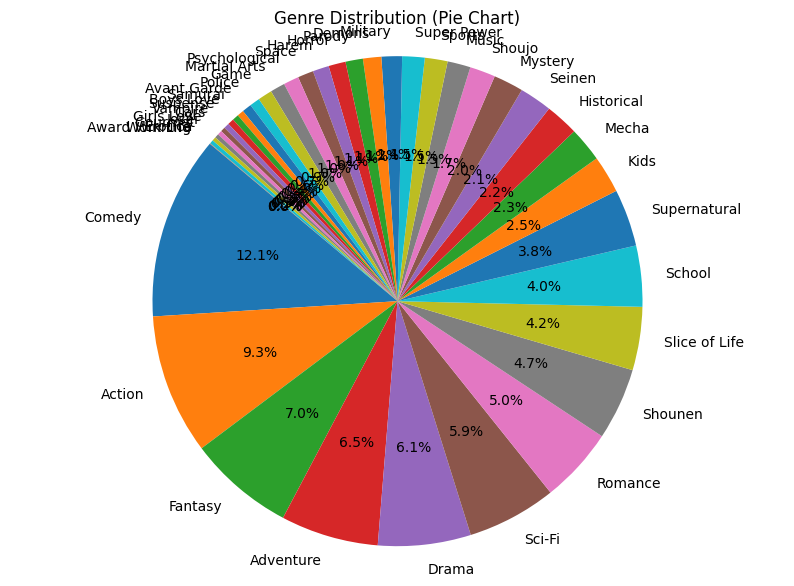

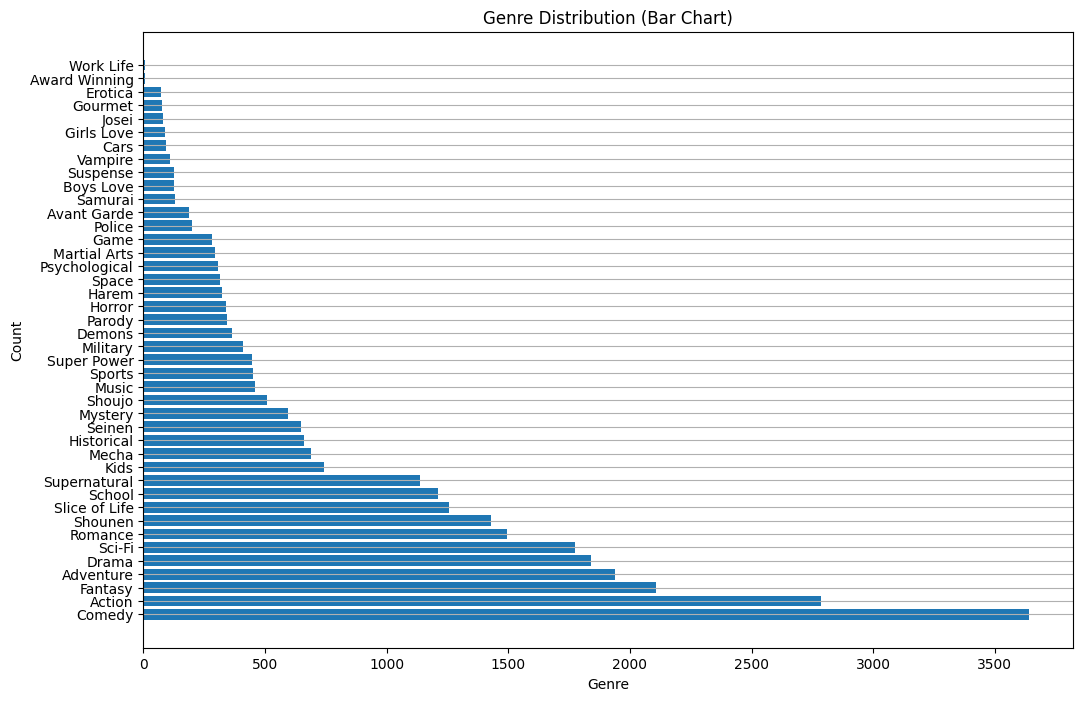

,Genre,Count
3,Comedy,3641
1,Action,2784
6,Fantasy,2108
2,Adventure,1940
27,Drama,1841
13,Sci-Fi,1774
14,Romance,1496
16,Shounen,1428
4,Slice of Life,1255
25,School,1210


In [104]:
#get the number of unique genres
df_genres=final_cleaned_dataset_df
# Split the genres and count occurrences
#from collections import Counter

# Flatten the list of genres after splitting each row by '|'
genre_counter = Counter(
    genre.strip() 
    for genre_list in df_genres['genres'] 
    for genre in genre_list
)

# Display the genre counts as a DataFrame for clarity
genre_counts_df = pd.DataFrame(genre_counter.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)
display(genre_counts_df)
genre_list = genre_counts_df['Genre'].tolist()

#Print number of unique genres
print("Number of unique genres")
print(genre_list)  

# Pie chart
plt.figure(figsize=(10, 7))
plt.pie(genre_counts_df['Count'], labels=genre_counts_df['Genre'], autopct='%1.1f%%', startangle=140)
plt.title('Genre Distribution (Pie Chart)')
plt.axis('equal')
plt.show()

# Bar chart
plt.figure(figsize=(12, 8))
plt.barh(genre_counts_df['Genre'], genre_counts_df['Count'])
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Distribution (Bar Chart)')
plt.grid(axis='y')
plt.show()
display(genre_counts_df)


In [ ]:

##DID NOT SEPERATE INTO "OTHERS" AS IT iS MULTI_LABEL task where the absence of a genre already implicitly means "not that genre."

# #Finding the percentage of each genre and separating genre smaller into Others
# percentage=[]
# for i in genre_counts_df["Count"]:
#     percentage.append(i/genre_counts_df["Count"].sum()*100)

# genre_counts_df["Percentage"]=percentage

# above_1 = genre_counts_df[genre_counts_df['Percentage'] >= 1]  #can change the value of division here and see how model performs
# below_1 = genre_counts_df[genre_counts_df['Percentage'] < 1]
# other_row = pd.DataFrame({
#     'Genre': ['Other'],
#     'Count': [below_1['Count'].sum()],
#     'Percentage': [below_1['Percentage'].sum()]
# })

# # Concatenate the dataframes
# final_df = pd.concat([above_1, other_row], ignore_index=True)
# final_genre_df=final_df


# print("Final list of genres")
# display(final_genre_df)
# #Showing the genres that got combined into OTHERS
# others_list = below_1['Genre'].tolist()
# print(others_list)  # prints first 5 elements

# # Pie chart
# plt.figure(figsize=(10, 7))
# plt.pie(final_df['Count'], labels=final_df['Genre'], autopct='%1.1f%%', startangle=140)
# plt.title('Genre Distribution (Pie Chart)')
# plt.axis('equal')
# plt.show()

# # Bar chart
# plt.figure(figsize=(12, 8))
# plt.barh(final_df['Genre'], final_df['Count'])
# plt.xlabel('Genre')
# plt.ylabel('Count')
# plt.title('Genre Distribution (Bar Chart)')
# plt.grid(axis='y')
# plt.show()

In [105]:
display(genre_counter.most_common(20))

top_20_genres = set([genre for genre, _ in genre_counter.most_common(20)])
top_20_genres

[('Comedy', 3641),
 ('Action', 2784),
 ('Fantasy', 2108),
 ('Adventure', 1940),
 ('Drama', 1841),
 ('Sci-Fi', 1774),
 ('Romance', 1496),
 ('Shounen', 1428),
 ('Slice of Life', 1255),
 ('School', 1210),
 ('Supernatural', 1136),
 ('Kids', 743),
 ('Mecha', 687),
 ('Historical', 661),
 ('Seinen', 646),
 ('Mystery', 593),
 ('Shoujo', 508),
 ('Music', 458),
 ('Sports', 451),
 ('Super Power', 445)]

{'Action',
 'Adventure',
 'Comedy',
 'Drama',
 'Fantasy',
 'Historical',
 'Kids',
 'Mecha',
 'Music',
 'Mystery',
 'Romance',
 'School',
 'Sci-Fi',
 'Seinen',
 'Shoujo',
 'Shounen',
 'Slice of Life',
 'Sports',
 'Super Power',
 'Supernatural'}

In [106]:
def filter_top_genres(genre_list):
    return [genre for genre in genre_list if genre in top_20_genres]

#Remove genres not in top 20 from list
final_cleaned_dataset_df['genres'] = final_cleaned_dataset_df['genres'].apply(filter_top_genres)
#Remove synopsis with empty genre
display(final_cleaned_dataset_df[final_cleaned_dataset_df['genres'].map(len) < 1])
final_cleaned_dataset_df = final_cleaned_dataset_df[final_cleaned_dataset_df['genres'].map(len) > 0]
display(final_cleaned_dataset_df)

,title,synopsis,genres
109,Teikou Penguin,Centers on a penguin who works in an abusive c...,[]
225,Oretacha Youkai Ningen,No synopsis information has been added to this...,[]
464,C Danchi,"""Housing Complex C"" centers around Kimi, who l...",[]
1215,Youkai Ningen Bem,"Three monsters, Bem, who looks like a gangster...",[]
1353,Battle Spirits: Burning Soul,"In the near future, a battle card game called ...",[]
...,...,...,...
12648,Buggy Map,Short animations by Densuke28 simulating video...,[]
12860,Hustle!! Tokitama-kun,"Director's description: ""I want to show you a ...",[]
12924,Anomalies,"We try to enrich ourselves through prayer, fai...",[]
13064,Yami no Teio: Kyuuketsuki Dracula,"On a seemingly normal night in Boston, a satan...",[]


,title,synopsis,genres
0,Touma Kishinden Oni,Shuramaru is hated and feared by the villagers...,[Supernatural]
1,Sabaku no Kaizoku! Captain Kuppa,"Sometime in the future, the world was complete...","[Action, Adventure]"
2,On Air Dekinai!,"Set in 2014, the anime follows the adventures ...",[Comedy]
3,Uchi no 3 Shimai,The daily life of the Motsumoto family. The th...,"[Comedy, Slice of Life]"
4,Running Man,"The Soul Tree, the great source of our race. ...","[Action, Adventure, Kids]"
...,...,...,...
13363,Zero no Tsukaima: Princesses no Rondo Picture ...,Picture Drama episodes included in each DVD vo...,"[Action, Adventure, Comedy, Drama, Fantasy, Ro..."
13368,Natsume Yuujinchou Roku Specials,"On a hot summer day, Takashi Natsume and his f...","[Drama, Slice of Life, Supernatural, Shoujo]"
13372,Gintama: Nanigoto mo Saiyo ga Kanjin nano de T...,"Due to the arrival of aliens called the ""Amant...","[Action, Comedy, Sci-Fi, Historical, Mecha, Sh..."
13373,Naruto: Dai Katsugeki!! Yuki Hime Shinobu Houj...,The Konohagakure Grand Sports Festival has beg...,"[Action, Comedy, Fantasy, Sports, Shounen]"


In [24]:
# checking if there is any duplicates
display(Counter(final_cleaned_dataset_df["title"]).most_common())
display(Counter(final_cleaned_dataset_df["synopsis"]).most_common())


[('Touma Kishinden Oni', 1),
 ('Sabaku no Kaizoku! Captain Kuppa', 1),
 ('On Air Dekinai!', 1),
 ('Uchi no 3 Shimai', 1),
 ('Running Man', 1),
 ('Fuwafuwa Hour: Pui Pui & Muu Muu', 1),
 ('Space Bug', 1),
 ('Bakujuu Gasshin Ziguru Hazeru', 1),
 ('Miracle! Mimika', 1),
 ('Fuwa no go renkan', 1),
 ('Norimono Man: Mobile Land no Car-kun', 1),
 ('RPG Fudousan', 1),
 ('Kick & Slide', 1),
 ('Hyouga Senshi Gaislugger', 1),
 ('Hyper Positive Yogoremon', 1),
 ('Chuldong! Super Wings', 1),
 ('Isekai Shoukan wa Nidome desu', 1),
 ('Totsugeki! Pappara-tai', 1),
 ('Poccolies', 1),
 ('Kyuumei Senshi Nanosaver', 1),
 ('Anoyo no Subete wa, Obake-gumi!', 1),
 ('Zhu Zhu Xia: Zhong Ji Jue Zhan - Qian Ye Pian', 1),
 ('Kkoma Sinseon Tao', 1),
 ('Neko no Nyagh: Nya Misérables', 1),
 ('Paripi Koumei', 1),
 ('Yofukashi no Uta', 1),
 ('Love All Play', 1),
 ('Nananin no Ayakashi: Chimi Chimi Mouryou!! Gendai Monogatari', 1),
 ('Hello Jadoo', 1),
 ('Isekai Meikyuu de Harem wo', 1),
 ('Technoroid: Overmind', 1),
 

[("A gag comedy about Oshiri Kajiri Mushi XVIII, a 10-year-old insect who goes to Biting School to inherit his family's Biting Shop business.",
  3),
 ("Nanocore is a science fiction Chinese cartoon in 3D. The stage of the story is established on a fictional planet Birthigin. In this young planet, humanity will never stop longing for a bright future despite reason and fear. In revolutions and evolutions, humanity keeps challenging the Creator, and which eventually induces contractions intensified. People choose to wake up and struggle for their own ideals. They end the peace and angers sweep the whole planet, resulting in outbreak of the crisis known as Purple Fog.  In time of humans facing their odds of survival, the plan N.S.P led by the elite keeps frustrating until NanoCore's involving. It brings the plan his birth. As the existence, that the elite thinks should lead the development of human weapons, however, he breaks shackles of fate, and arrives at a land where faith no longer e

In [ ]:
# # List of genres to categorize as "Other"
# genres_to_replace = others_list

# # Function to replace genres
# def replace_genres(genres_list, replace_list):
#     return ['Other' if genre in replace_list else genre for genre in genres_list]

# # Apply the function to your DataFrame
# final_cleaned_dataset_df['genres'] = final_cleaned_dataset_df['genres'].apply(lambda x: replace_genres(x, genres_to_replace))

# # Optional: Remove duplicate 'Other' if it appears multiple times in the same list
# final_cleaned_dataset_df['genres'] = final_cleaned_dataset_df['genres'].apply(lambda x: list(set(x)))

# final_cleaned_dataset_df

C:\Users\User\AppData\Local\Temp\ipykernel_11084\3296887643.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_cleaned_dataset_df['genres'] = final_cleaned_dataset_df['genres'].apply(lambda x: replace_genres(x, genres_to_replace))
C:\Users\User\AppData\Local\Temp\ipykernel_11084\3296887643.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_cleaned_dataset_df['genres'] = final_cleaned_dataset_df['genres'].apply(lambda x: list(set(x)))


,title,synopsis,genres
0,Touma Kishinden Oni,Shuramaru is hated and feared by the villagers...,[Supernatural]
1,Sabaku no Kaizoku! Captain Kuppa,"Sometime in the future, the world was complete...","[Action, Adventure]"
2,On Air Dekinai!,"Set in 2014, the anime follows the adventures ...",[Comedy]
3,Uchi no 3 Shimai,The daily life of the Motsumoto family. The th...,"[Comedy, Slice of Life]"
4,Running Man,"The Soul Tree, the great source of our race. ...","[Action, Adventure, Kids]"
...,...,...,...
13374,Steins;Gate: Kyoukaimenjou no Missing Link - D...,"Having reached his emotional breaking point, R...","[Other, Sci-Fi]"
13375,Grisaia no Meikyuu: Caprice no Mayu 0 - Takizo...,Special bundled with the Blu-ray/DVD volume of .,[Ecchi]
13376,Bikini Warriors Special,"According to the official Hobby Japan website,...","[Ecchi, Comedy, Parody, Fantasy]"
13377,Re:Zero kara Hajimeru Break Time,A series of comedic shorts featuring chibi ver...,"[Parody, Adventure, Comedy, Fantasy]"


In [ ]:
#Save original whole dataset
# final_cleaned_dataset_df.to_csv('final_cleaned_dataset_df.csv', index=False)

# Splitting into train val and test dataset

,title,synopsis,genres,index
0,Touma Kishinden Oni,Shuramaru is hated and feared by the villagers...,"(Supernatural,)",0
1,Sabaku no Kaizoku! Captain Kuppa,"Sometime in the future, the world was complete...","(Action, Adventure)",1
2,On Air Dekinai!,"Set in 2014, the anime follows the adventures ...","(Comedy,)",2
3,Space Bug,"This story is about Mick, a sleeping chironomi...","(Adventure,)",11
4,Bakujuu Gasshin Ziguru Hazeru,The anime is based on MegaHouse's line of Zigu...,"(Action, Mecha)",13
...,...,...,...,...
7115,Zero no Tsukaima: Princesses no Rondo Picture ...,Picture Drama episodes included in each DVD vo...,"(Action, Adventure, Comedy, Drama, Fantasy, Ro...",13363
7116,Natsume Yuujinchou Roku Specials,"On a hot summer day, Takashi Natsume and his f...","(Drama, Shoujo, Slice of Life, Supernatural)",13368
7117,Gintama: Nanigoto mo Saiyo ga Kanjin nano de T...,"Due to the arrival of aliens called the ""Amant...","(Action, Comedy, Historical, Mecha, Sci-Fi, Sh...",13372
7118,Naruto: Dai Katsugeki!! Yuki Hime Shinobu Houj...,The Konohagakure Grand Sports Festival has beg...,"(Action, Comedy, Fantasy, Shounen, Sports)",13373


,title,synopsis,genres,index
0,Panpaka Pants O-New!,Follows a pig whose family's mission is to col...,"(Comedy, Kids)",8
1,RPG Fudousan,The story begins 15 years after the demon king...,"(Comedy, Fantasy, Slice of Life)",20
2,Hyper Positive Yogoremon,"The story centers on Otarou, a creature themed...","(Comedy,)",24
3,Chuldong! Super Wings,follows the adventures of an adorable jet plan...,"(Adventure, Kids)",25
4,Totsugeki! Pappara-tai,"An elite soldier, whose nickname is God of Dea...","(Action, Adventure, Comedy, Romance, Sci-Fi)",31
...,...,...,...,...
887,Fairy Tail Movie 1: Houou no Miko - Hajimari n...,This special is showing a day of Eclair's life...,"(Fantasy, Shounen)",12650
888,"Mini Toji: Kanami-Mihono no ""Toji Miko Taidou-...",Episode 0 of . Kanami and Mihono are self-awar...,"(Action,)",12752
889,Lion meets HachiClo,The ad's crossover theme matches a tote bag bu...,"(Seinen, Slice of Life)",12817
890,Zekkyou Gakkyuu: Tensei,A girl's classmate disappears during a game of...,"(Shoujo, Supernatural)",12880


,title,synopsis,genres,index
0,Uchi no 3 Shimai,The daily life of the Motsumoto family. The th...,"(Comedy, Slice of Life)",3
1,Running Man,"The Soul Tree, the great source of our race. ...","(Action, Adventure, Kids)",4
2,Fuwafuwa Hour: Pui Pui & Muu Muu,"Fairies living in a fluffy forest, where both ...","(Fantasy, Kids)",10
3,Hyouga Senshi Gaislugger,A cyborg warrior from an ancient Antarctic kin...,"(Action, Mecha, Sci-Fi)",23
4,Poccolies,The 2018 LINE sticker set Poccolies is inspiri...,"(Kids, Slice of Life)",34
...,...,...,...,...
886,Street Fighter IV: Aftermath,A series of four animated prequels to Street F...,"(Action,)",11644
887,Ookiku Furikabutte: Natsu no Taikai-hen – Moku...,"According to HMV, the DVD & Blu-ray volume 7 o...","(Comedy, Seinen, Sports)",12052
888,Thermae Romae: Kodai Romajin ga Uchuu e,"Lucius ends up in a space station, where he ex...","(Comedy, Seinen)",12296
889,Megumi to Taiyou: Kajuu Gummi Tweet Love Story,"The ""Megumi and Taiyou"" commercial depicts the...","(Romance, Slice of Life)",12447


Train label distribution:
 Action           2227
Adventure        1552
Comedy           2913
Drama            1473
Fantasy          1686
Historical        529
Kids              594
Mecha             543
Music             366
Mystery           474
Romance          1195
School            968
Sci-Fi           1419
Seinen            507
Shoujo            402
Shounen          1141
Slice of Life    1004
Sports            361
Super Power       356
Supernatural      909
dtype: int32
Val label distribution:
 Action           278
Adventure        205
Comedy           364
Drama            184
Fantasy          214
Historical        66
Kids              75
Mecha             69
Music             46
Mystery           60
Romance          144
School           121
Sci-Fi           178
Seinen            70
Shoujo            57
Shounen          142
Slice of Life    125
Sports            45
Super Power       45
Supernatural     113
dtype: int32
Test label distribution:
 Action           279
Adventure      

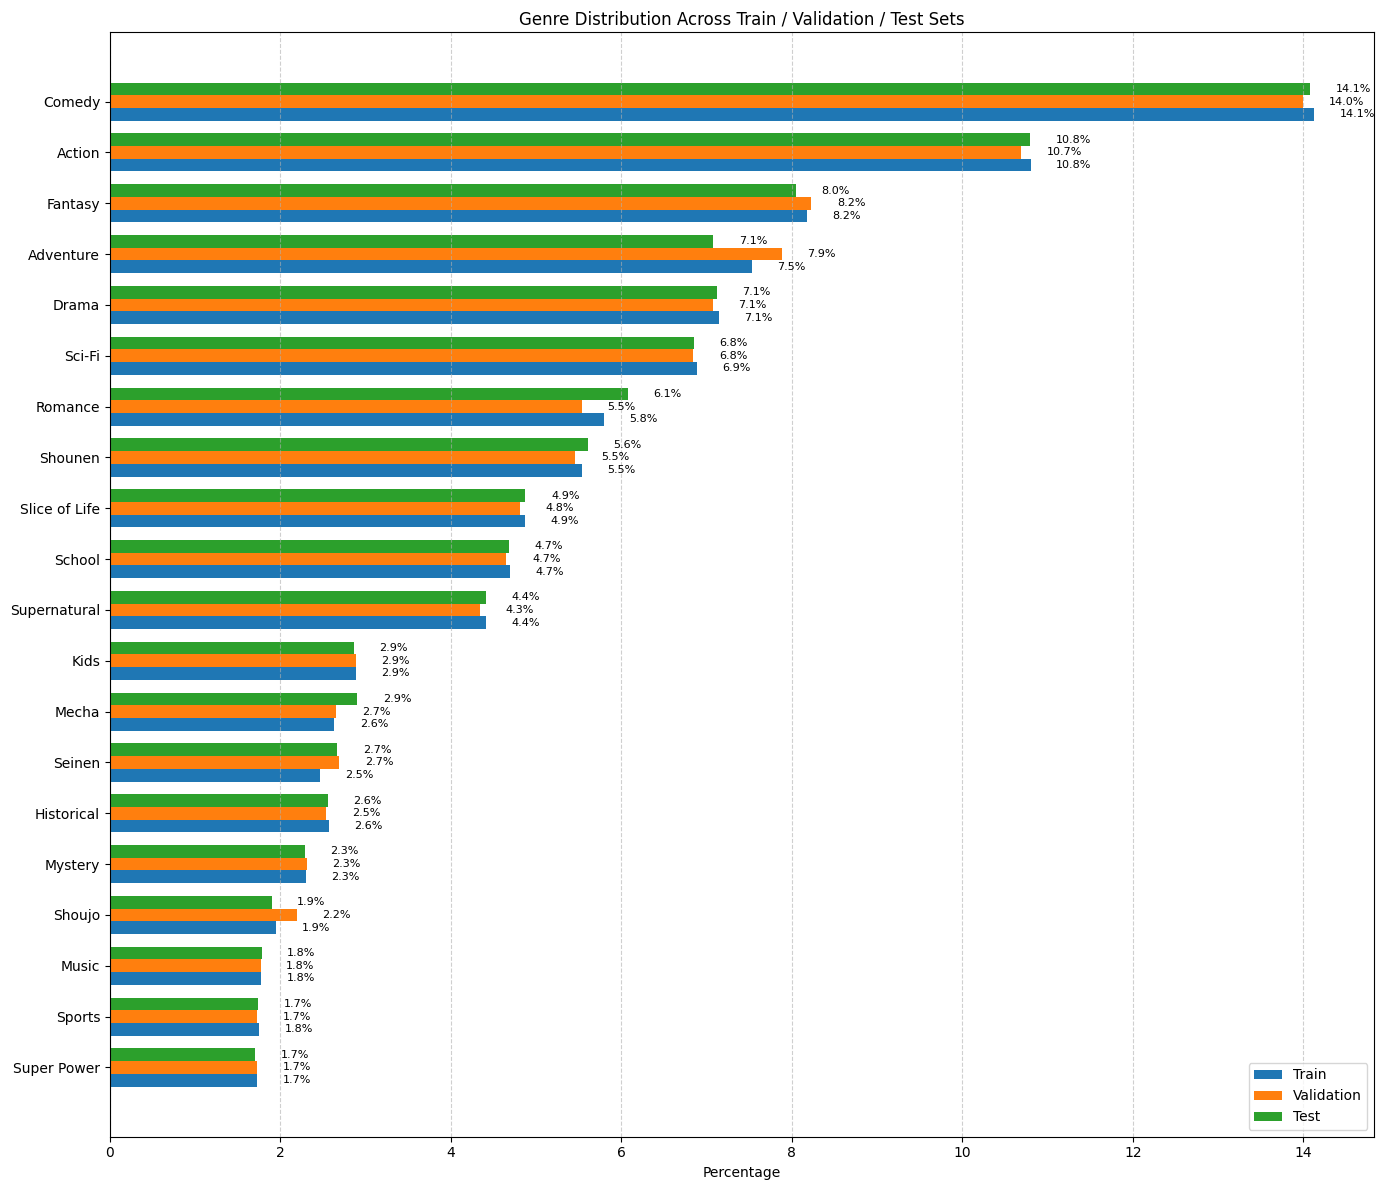

In [107]:
# from skmultilearn.model_selection import iterative_train_test_split

# Let's assume this is your main DataFrame
df = final_cleaned_dataset_df.copy()

# Step 1: One-hot encode genres
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df['genres'])  # assumes genre is a list
df['index'] = df.index  # store original indices

# Step 2: Prepare X for iterative split (with synopsis and index)
X = df[['synopsis', 'index']].values  # shape: (n_samples, 2)

# Step 3: Perform iterative train/test/val split
X_train, y_train, X_temp, y_temp = iterative_train_test_split(X, y, test_size=0.2)
X_val, y_val, X_test, y_test = iterative_train_test_split(X_temp, y_temp, test_size=0.5)

# Step 4: Rebuild DataFrames from indices
def rebuild_df(X_subset, y_subset, original_df, mlb):
    indices = [int(x[1]) for x in X_subset]  # extract indices
    df_part = original_df.loc[indices].copy()
    df_part['genres'] = mlb.inverse_transform(y_subset)
    return df_part.reset_index(drop=True)

df_train = rebuild_df(X_train, y_train, df, mlb)
df_val = rebuild_df(X_val, y_val, df, mlb)
df_test = rebuild_df(X_test, y_test, df, mlb)

display(df_train)
display(df_val)
display(df_test)

#Printing the distribution of the dataset genres

def label_dist(df_part):
    return pd.Series(np.sum(mlb.transform(df_part['genres']), axis=0), index=mlb.classes_)

print("Train label distribution:\n", label_dist(df_train))
print("Val label distribution:\n", label_dist(df_val))
print("Test label distribution:\n", label_dist(df_test))

#VERIFY SPLIT by plotting a horizontal bar chart

# Step 1: Function to compute percentage distribution
def compute_label_percentages(df):
    mlb = MultiLabelBinarizer()
    y = mlb.fit_transform(df['genres'])
    label_counts = np.sum(y, axis=0)
    label_percentages = label_counts / label_counts.sum() * 100
    return pd.Series(label_percentages, index=mlb.classes_)

# Step 2: Get distributions
train_dist = compute_label_percentages(df_train)
val_dist = compute_label_percentages(df_val)
test_dist = compute_label_percentages(df_test)

# Step 3: Combine into one DataFrame
combined_df = pd.DataFrame({
    'Train': train_dist,
    'Validation': val_dist,
    'Test': test_dist
}).fillna(0)

# Step 4: Sort by average for consistent plotting
combined_df = combined_df.loc[combined_df.mean(axis=1).sort_values().index]

# Step 5: Plot side-by-side horizontal bar chart with labels
plt.figure(figsize=(14, 12))
bar_width = 0.25
indices = np.arange(len(combined_df))

bars1 = plt.barh(indices - bar_width, combined_df['Train'], bar_width, label='Train')
bars2 = plt.barh(indices, combined_df['Validation'], bar_width, label='Validation')
bars3 = plt.barh(indices + bar_width, combined_df['Test'], bar_width, label='Test')

plt.yticks(indices, combined_df.index)
plt.xlabel('Percentage')
plt.title('Genre Distribution Across Train / Validation / Test Sets')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Add text labels for each bar
def add_labels(bars):
    for bar in bars:
        width = bar.get_width()
        if width > 0:
            plt.text(width + 0.3, bar.get_y() + bar.get_height()/2, f'{width:.1f}%', va='center', fontsize=8)

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

plt.tight_layout()
plt.show()



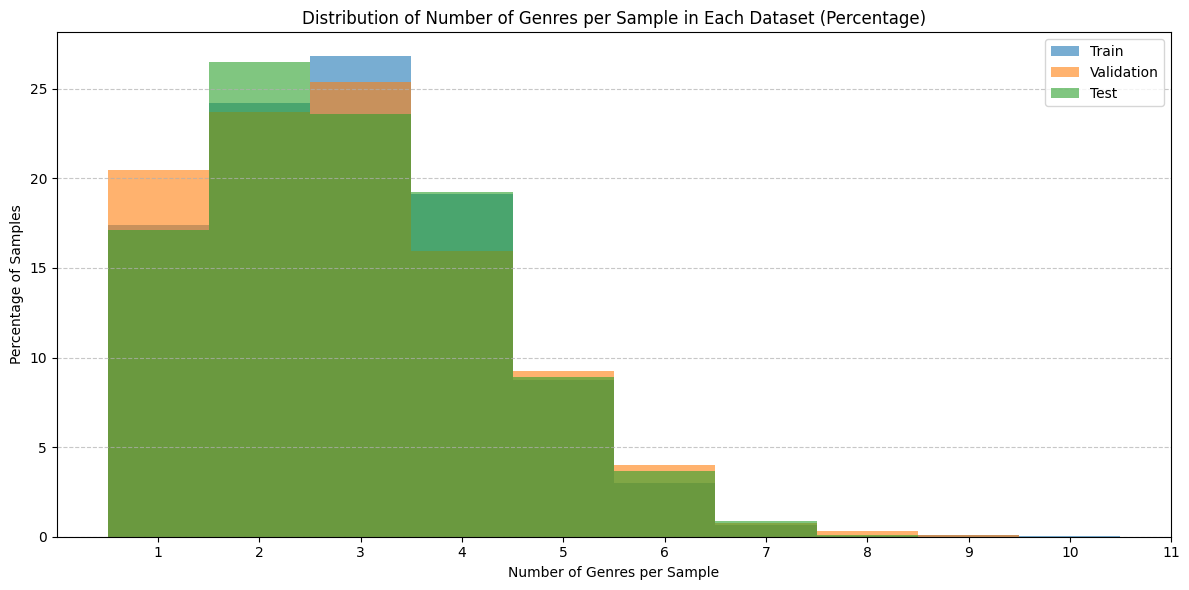

Average genres per sample:
Train: 2.90 ± 1.37
Validation: 2.87 ± 1.48
Test: 2.92 ± 1.41


In [96]:
# Count how many genres each sample has
def count_genres_per_sample(df):
    return df['genres'].apply(len)

# Compute genre counts
train_genre_counts = count_genres_per_sample(df_train)
val_genre_counts = count_genres_per_sample(df_val)
test_genre_counts = count_genres_per_sample(df_test)

# Combine all counts to determine the bins
bins = range(1, max(train_genre_counts.max(), val_genre_counts.max(), test_genre_counts.max()) + 2)

# Plot histograms as percentages
plt.figure(figsize=(12, 6))
plt.hist(train_genre_counts, bins=bins, alpha=0.6, label='Train', align='left', weights=np.ones(len(train_genre_counts)) / len(train_genre_counts) * 100)
plt.hist(val_genre_counts, bins=bins, alpha=0.6, label='Validation', align='left', weights=np.ones(len(val_genre_counts)) / len(val_genre_counts) * 100)
plt.hist(test_genre_counts, bins=bins, alpha=0.6, label='Test', align='left', weights=np.ones(len(test_genre_counts)) / len(test_genre_counts) * 100)

plt.xticks(bins)
plt.xlabel('Number of Genres per Sample')
plt.ylabel('Percentage of Samples')
plt.title('Distribution of Number of Genres per Sample in Each Dataset (Percentage)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print average and std deviation
print("Average genres per sample:")
print(f"Train: {train_genre_counts.mean():.2f} ± {train_genre_counts.std():.2f}")
print(f"Validation: {val_genre_counts.mean():.2f} ± {val_genre_counts.std():.2f}")
print(f"Test: {test_genre_counts.mean():.2f} ± {test_genre_counts.std():.2f}")


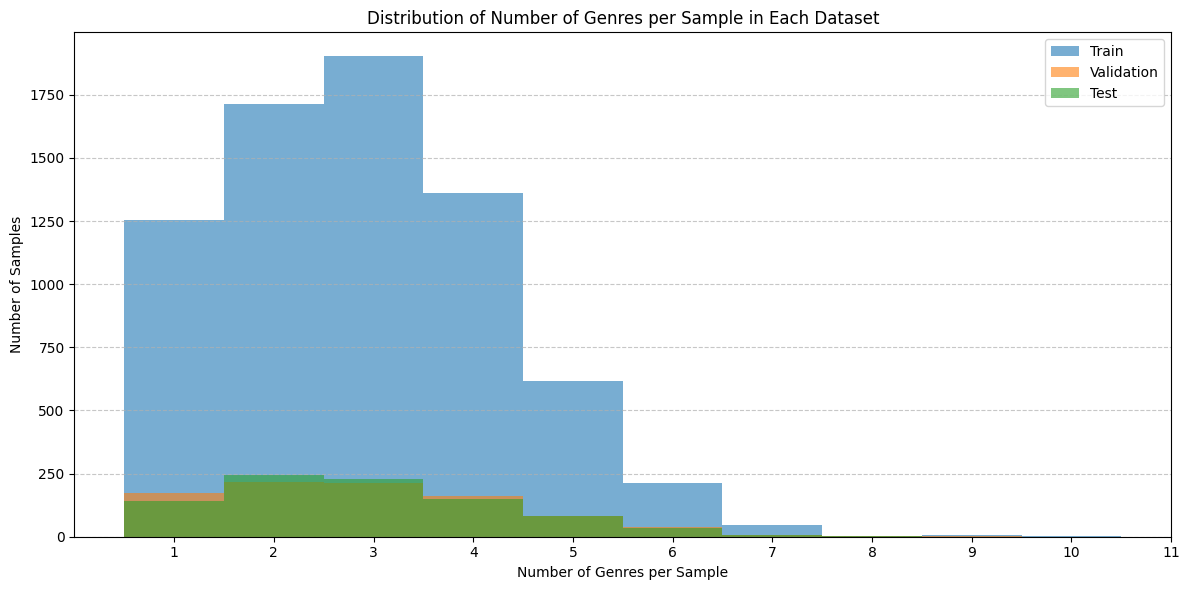

Average genres per sample:
Train: 2.90 ± 1.38
Validation: 2.90 ± 1.47
Test: 2.91 ± 1.40


In [94]:
# Count how many genres each sample has
def count_genres_per_sample(df):
    return df['genres'].apply(len)

# Compute genre counts
train_genre_counts = count_genres_per_sample(df_train)
val_genre_counts = count_genres_per_sample(df_val)
test_genre_counts = count_genres_per_sample(df_test)

# Plot histograms to show distribution of genres per sample
plt.figure(figsize=(12, 6))
bins = range(1, max(train_genre_counts.max(), val_genre_counts.max(), test_genre_counts.max()) + 2)

plt.hist(train_genre_counts, bins=bins, alpha=0.6, label='Train', align='left')
plt.hist(val_genre_counts, bins=bins, alpha=0.6, label='Validation', align='left')
plt.hist(test_genre_counts, bins=bins, alpha=0.6, label='Test', align='left')

plt.xticks(bins)
plt.xlabel('Number of Genres per Sample')
plt.ylabel('Number of Samples')
plt.title('Distribution of Number of Genres per Sample in Each Dataset')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Optionally print average and std deviation
print("Average genres per sample:")
print(f"Train: {train_genre_counts.mean():.2f} ± {train_genre_counts.std():.2f}")
print(f"Validation: {val_genre_counts.mean():.2f} ± {val_genre_counts.std():.2f}")
print(f"Test: {test_genre_counts.mean():.2f} ± {test_genre_counts.std():.2f}")


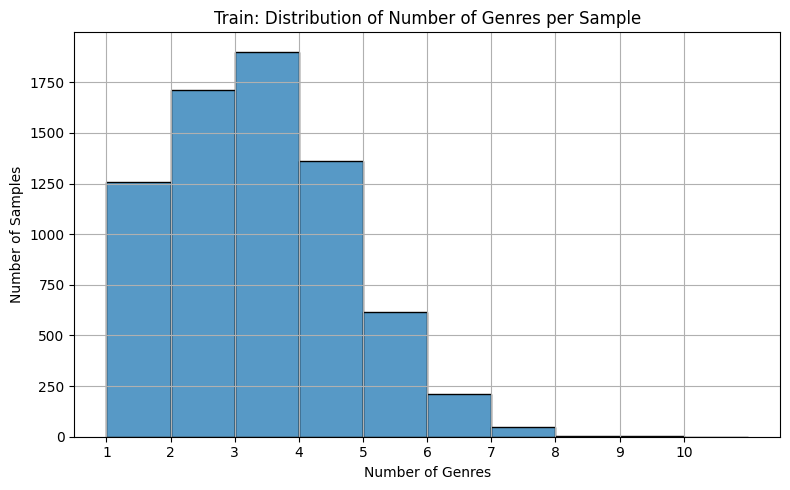

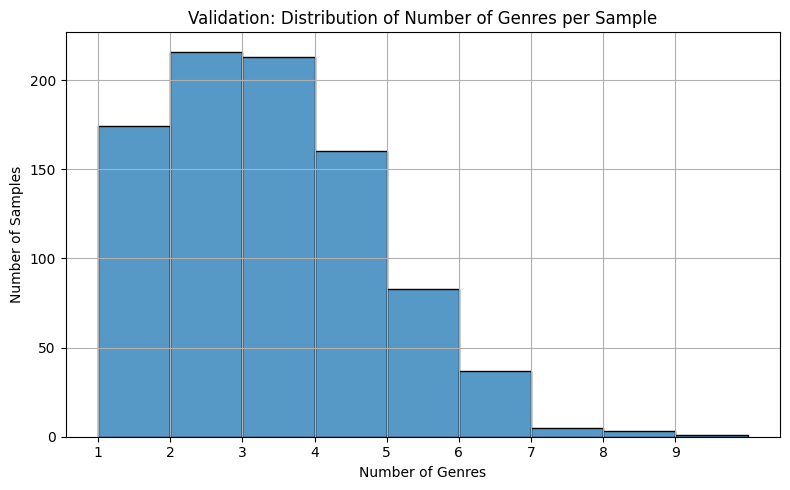

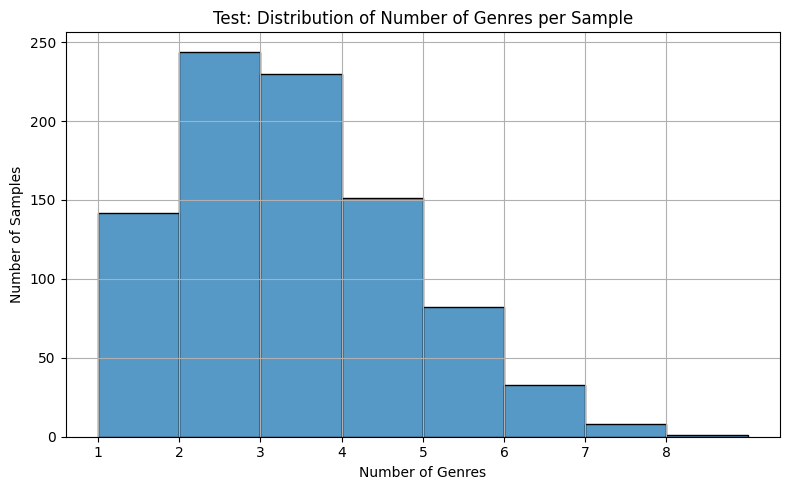

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_genre_distribution(df, name="Dataset"):
    # Count how many genres each sample has
    genre_counts = df['genres'].apply(len)

    plt.figure(figsize=(8, 5))
    sns.histplot(genre_counts, bins=range(1, genre_counts.max() + 2), kde=False)
    plt.title(f"{name}: Distribution of Number of Genres per Sample")
    plt.xlabel("Number of Genres")
    plt.ylabel("Number of Samples")
    plt.xticks(range(1, genre_counts.max() + 1))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage
plot_genre_distribution(df_train, "Train")
plot_genre_distribution(df_val, "Validation")
plot_genre_distribution(df_test, "Test")


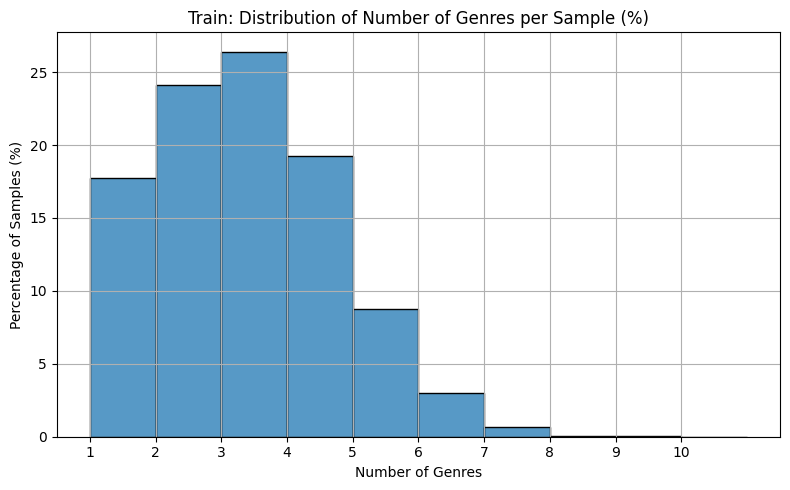

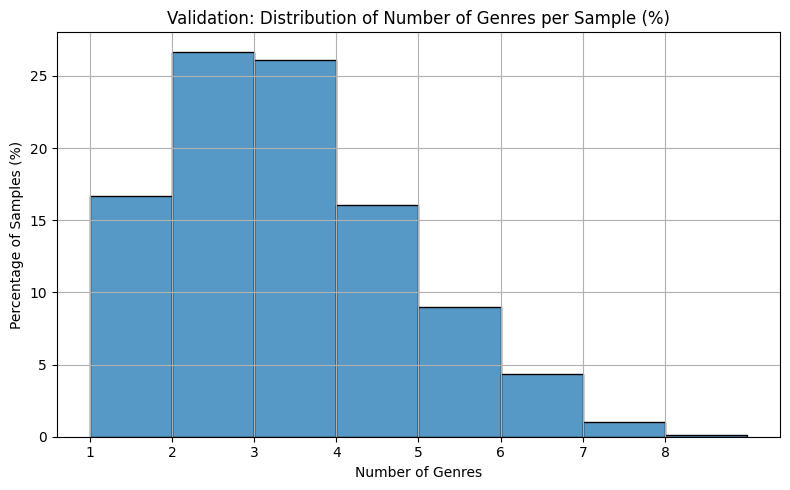

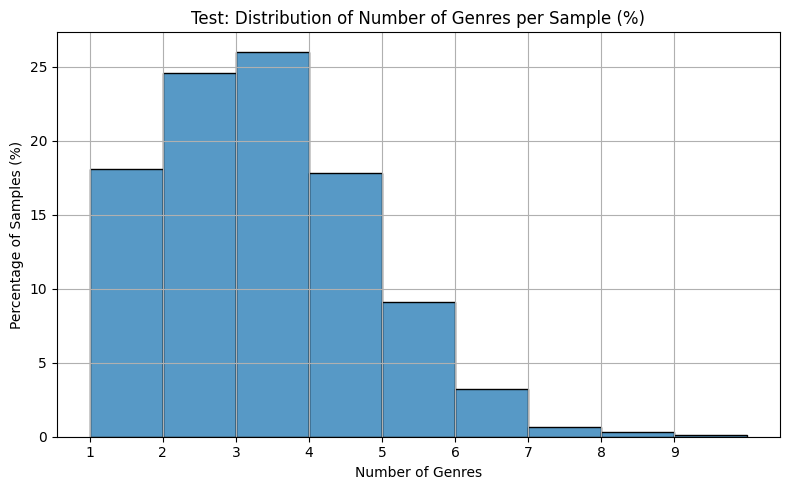

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_genre_distribution(df, name="Dataset"):
    # Count number of genres per sample
    genre_counts = df['genres'].apply(len)

    # Convert to Series for Seaborn compatibility
    genre_counts = pd.Series(genre_counts)

    # Compute weights so each bar reflects percentage
    weights = np.ones_like(genre_counts) * (100 / len(genre_counts))

    plt.figure(figsize=(8, 5))
    sns.histplot(x=genre_counts, bins=range(1, genre_counts.max() + 2), weights=weights, kde=False)
    plt.title(f"{name}: Distribution of Number of Genres per Sample (%)")
    plt.xlabel("Number of Genres")
    plt.ylabel("Percentage of Samples (%)")
    plt.xticks(range(1, genre_counts.max() + 1))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage
plot_genre_distribution(df_train, "Train")
plot_genre_distribution(df_val, "Validation")
plot_genre_distribution(df_test, "Test")


## Save the dataset as csv

In [111]:
final_cleaned_dataset_df.to_csv('final_cleaned_dataset_df.csv', index=False)

In [109]:

df_train.to_csv('df_train.csv', index=False)
df_val.to_csv('df_val.csv', index=False)
df_test.to_csv('df_test.csv', index=False)

# Word count baseline model CountVEctorizer BoW + Linear regression method


## Making functions for metric calculation

In [41]:
#Making changes to the threshol values to see how i affects
#Decreasing the threshold causes the F1-macro to increase
#This may be due to it making more predictions that causes it to be more leanient and correct
def LR_OVA_prob(xtest,threshold,classifier):
    y_pred_prob = classifier.predict_proba(xtest)
    t=threshold
    y_pred_new = (y_pred_prob >= t).astype(int)
    return y_pred_new

def print_report(y_true, y_pred,avg_type,metric, mlb):
    report=classification_report(y_true, y_pred, target_names=mlb.classes_,output_dict=True)
    metric_val=report[avg_type][metric]
    print(avg_type,metric,"=",metric_val)
    return metric_val

# y_pred_val=LR_OVA_prob(X_val,0.5)
# print_report(y_val,y_pred_val,"samples avg","f1-score")


# # predict probabilities
# y_pred_prob = classifier.predict_proba(X_test)
# t = 0.6 # threshold value
# y_pred_new = (y_pred_prob >= t).astype(int)
# #print(y_pred_new)
# report = classification_report(y_test, y_pred_test, target_names=mlb.classes_,output_dict=True)
# macro_f1 = report['samples avg']['recall']
# print("Macro F1-score:", macro_f1)

In [42]:
# Convert predictions and ground truth from binary to label format

def result_table(y_true,y_pred,df,mlb):
    actual_genres = mlb.inverse_transform(y_true)
    predicted_genres = mlb.inverse_transform(y_pred)
    # Create a new DataFrame to display results
    results_df = pd.DataFrame({
    'Synopsis': df['synopsis'],
    'Actual Genres': actual_genres,
    'Predicted Genres': predicted_genres
    })
    return results_df

# result_table(y_test,y_pred_test,df_test)
# result_table(y_train,y_pred_train,df_train)

# actual_genres = mlb.inverse_transform(y_test)
# predicted_genres = mlb.inverse_transform(y_pred_test)

# # Create a new DataFrame to display results
# results_df = pd.DataFrame({
#     'Synopsis': df_test['synopsis'],
#     'Actual Genres': actual_genres,
#     'Predicted Genres': predicted_genres
# })

# # Optional: visually inspect the first few rows
# results_df

In [43]:
#from sklearn.metrics import jaccard_score
#Calculating jaccard score
# jaccard = jaccard_score(y_test, y_pred_test, average='samples')
# print("Jaccard Similarity:", jaccard)

#Calculating hit rate
def hit_rate(y_true, y_pred):
    hits = np.logical_and(y_true, y_pred).sum(axis=1) > 0
    return hits.mean()


# hr = hit_rate(y_test, y_pred_test)
# print("Hit Rate:", hr)



## Model

In [45]:
#Parameters that can be changed:
#Number of wordds in vocublary
#Class weighting

# from sklearn.feature_extraction.text import CountVectorizer
mlb=MultiLabelBinarizer()
y_train = mlb.fit_transform(df_train['genres'])
#display(y)
vectorizer = CountVectorizer(stop_words='english', max_features=1000, ngram_range=(1,2))
X_train = vectorizer.fit_transform(df_train['synopsis'])
#display(X_train)
#print(vectorizer.get_feature_names_out(),len(vectorizer.get_feature_names_out()))
#print(X_train.toarray())

y_val= mlb.fit_transform(df_val['genres'])
X_val = vectorizer.fit_transform(df_val['synopsis'])
y_test= mlb.fit_transform(df_test['genres'])
X_test = vectorizer.fit_transform(df_test['synopsis'])

# from sklearn.multiclass import OneVsRestClassifier
# from sklearn.linear_model import LogisticRegression

classifier = OneVsRestClassifier(LogisticRegression(class_weight="balanced",max_iter=1000)) #Already tried with balanced class but it is worse
classifier.fit(X_train, y_train)                                    #At least when it is not balanced it can overfit the train class

# from sklearn.metrics import classification_report
#samples	How well did we predict each movie's genres?	✅ Best for your task
#micro	    Overall genre prediction accuracy	            ✅ Good for global view
#macro	    Equal focus on rare and frequent genres	        ⚠️ Careful with imbalance
#weighted	Genre performance balanced by frequency	        ✅ Fair but skew-sensitive
#USE SAMPLES


print("Report for Train dataset")
threshold=0.5
y_pred_train=LR_OVA_prob(X_train,threshold,classifier)
print_report(y_train,y_pred_train,"samples avg","f1-score",mlb)
jaccard = jaccard_score(y_train, y_pred_train, average='samples')
print("Jaccard Similarity:", jaccard)
hr = hit_rate(y_train, y_pred_train)
print("Hit Rate:", hr)

print("----------------------")
print("Report for Val dataset")
y_pred_val=LR_OVA_prob(X_val,threshold,classifier)
print_report(y_val,y_pred_val,"samples avg","f1-score",mlb)
jaccard = jaccard_score(y_val, y_pred_val, average='samples')
print("Jaccard Similarity:", jaccard)
hr = hit_rate(y_val, y_pred_val)
print("Hit Rate:", hr)

print("----------------------")
print("Report for Test dataset")
y_pred_test=LR_OVA_prob(X_test,threshold,classifier)
print_report(y_test,y_pred_test,"samples avg","f1-score",mlb)
jaccard = jaccard_score(y_test, y_pred_test, average='samples')
print("Jaccard Similarity:", jaccard)
hr = hit_rate(y_val, y_pred_val)
print("Hit Rate:", hr)



display(result_table(y_train,y_pred_train,df_train,mlb))
display(result_table(y_val,y_pred_val,df_val,mlb))
display(result_table(y_test,y_pred_test,df_test,mlb))



# print("samples F1-score:", samples_f1)
# print("Report for Val datset")
# y_pred_val=classifier.predict(X_val)
# report=classification_report(y_val, y_pred_val, target_names=mlb.classes_,output_dict=True)
# samples_f1 = report['samples avg']['f1-score']
# print("samples F1-score:", samples_f1)
# print("Report for Test dataset")
# y_pred_test=classifier.predict(X_test)
# report=classification_report(y_test, y_pred_test, target_names=mlb.classes_,output_dict=True)
# samples_f1 = report['samples avg']['f1-score']
# print("samples F1-score:", samples_f1)


# print("Report for Train dataset")
# y_pred_train = classifier.predict(X_train)
# report = classification_report(y_train, y_pred_train, target_names=mlb.classes_,output_dict=True)
# samples_f1 = report['samples avg']['f1-score']
# print("samples F1-score:", samples_f1)
# print("Report for Val datset")
# y_pred_val=classifier.predict(X_val)
# report=classification_report(y_val, y_pred_val, target_names=mlb.classes_,output_dict=True)
# samples_f1 = report['samples avg']['f1-score']
# print("samples F1-score:", samples_f1)
# print("Report for Test dataset")
# y_pred_test=classifier.predict(X_test)
# report=classification_report(y_test, y_pred_test, target_names=mlb.classes_,output_dict=True)
# samples_f1 = report['samples avg']['f1-score']
# print("samples F1-score:", samples_f1)

Report for Train dataset
samples avg f1-score = 0.5594906610314193
Jaccard Similarity: 0.4269541213439451
Hit Rate: 0.9491249048809653
----------------------
Report for Val dataset
samples avg f1-score = 0.20333042180896335
Jaccard Similarity: 0.12697016182529788
Hit Rate: 0.6163301141352063
----------------------
Report for Test dataset
samples avg f1-score = 0.2124237831535724
Jaccard Similarity: 0.13299527168275205
Hit Rate: 0.6163301141352063


c:\Users\User\anaconda3\envs\NLP_CW\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\anaconda3\envs\NLP_CW\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Synopsis,Actual Genres,Predicted Genres
0,"Sometime in the future, the world was complete...","(Action, Adventure)","(Adventure, Fantasy, Sci-Fi)"
1,"Set in 2014, the anime follows the adventures ...","(Comedy,)","(Comedy, Fantasy, Shounen, Slice of Life)"
2,Follows a pig whose family's mission is to col...,"(Comedy, Kids)","(Comedy, Ecchi, Kids, Slice of Life)"
3,"In honor of the 2018 World Cup, this season of...","(Kids, Sci-Fi, Sports, Super Power)","(Action, Drama, Kids, Sci-Fi, Sports, Super Po..."
4,"Fairies living in a fluffy forest, where both ...","(Fantasy, Kids)","(Comedy, Fantasy, Horror, Kids)"
...,...,...,...
9194,The Konohagakure Grand Sports Festival has beg...,"(Action, Comedy, Fantasy, Other, Shounen, Sports)","(Action, Adventure, Comedy, Drama, Fantasy, Ot..."
9195,Special bundled with the Blu-ray/DVD volume of .,"(Ecchi,)","(Comedy, Ecchi, Fantasy, Harem, Music, School,..."
9196,"According to the official Hobby Japan website,...","(Comedy, Ecchi, Fantasy, Parody)","(Action, Comedy, Ecchi, Fantasy, Music, Seinen..."
9197,A series of comedic shorts featuring chibi ver...,"(Adventure, Comedy, Fantasy, Parody)","(Comedy, Kids, Music, Parody)"


,Synopsis,Actual Genres,Predicted Genres
0,The daily life of the Motsumoto family. The th...,"(Comedy, Slice of Life)","(Harem, Military, Other, Romance, Sci-Fi)"
1,Himeno Mimika is a daughter of historical cook...,"(Kids, Other, Slice of Life)","(Ecchi, Sci-Fi, Shounen)"
2,"An elite soldier, whose nickname is God of Dea...","(Action, Adventure, Comedy, Romance, Sci-Fi)","(Drama, Romance, Sci-Fi)"
3,"The third show in the Virtual Trilogy, a mix o...","(Adventure, Shounen)","(Adventure, Comedy, Horror, Mystery, Romance, ..."
4,The offensive and defensive battles between No...,"(Comedy,)","(Ecchi, Other, Parody, School, Sports)"
...,...,...,...
1134,"At Anime Japan 2018, Warner Bros. announced a ...","(Other, Parody)","(Drama, Mystery, Seinen, Sports)"
1135,Specials included in the OVA of Hyakujitsu no ...,"(Other, Parody)","(Hentai, Military, Music, Slice of Life)"
1136,Three episodes aired on TV as part of the Ribo...,"(Shoujo,)","(Comedy, Ecchi, Fantasy)"
1137,The Future Foundation is in shambles after the...,"(Action, Horror, Mystery, Other)","(Action, Comedy, Drama, Ecchi, Other, Supernat..."


,Synopsis,Actual Genres,Predicted Genres
0,Shuramaru is hated and feared by the villagers...,"(Supernatural,)","(Ecchi, Kids, Slice of Life)"
1,"The Soul Tree, the great source of our race. ...","(Action, Adventure, Kids)","(Action, Adventure, Comedy, Drama, Fantasy, Sh..."
2,The story begins 15 years after the demon king...,"(Comedy, Fantasy, Slice of Life)","(Action, Drama, Fantasy, Romance, Sci-Fi, Shou..."
3,The third generation of J SOUL BROTHERS from E...,"(Kids, Music)","(Adventure, Comedy, Demons, Drama, Parody, Sch..."
4,A cyborg warrior from an ancient Antarctic kin...,"(Action, Mecha, Sci-Fi)","(Action, Drama, Historical, Sci-Fi, Shounen)"
...,...,...,...
1117,Short specials involving the characters from t...,"(Harem,)","(Comedy, Ecchi, Music, Parody, Shounen)"
1118,Three episodes aired on TV as part of the Ribo...,"(Shoujo, Supernatural)","(Adventure, Horror, Kids, Other, Slice of Life)"
1119,Short mini-theater specials included in the BD...,"(Slice of Life, Supernatural)","(Comedy, Demons, Fantasy, Horror, Shoujo, Slic..."
1120,DVD/BD specials featuring two female cast memb...,"(Ecchi, Seinen)","(Adventure, Comedy, Drama, Historical, Music, ..."


## Testing new infference

In [46]:
#Predict new genres from user infference

new_synopsis = ["A naive but strong boy named Goku sets off to find seven mystical Dragon Balls, sparking a wild adventure filled with martial arts, quirky allies, strange foes, and a journey of growth across a fantastical world."]

X_new = vectorizer.transform(new_synopsis)
y_pred=LR_OVA_prob(X_new,0.5,classifier)
predicted_genres = mlb.inverse_transform(y_pred)
print(predicted_genres)

# X_new = vectorizer.transform(new_synopsis)
# y_pred_prob = classifier.predict_proba(X_new)
# t = 0.5 # threshold value
# y_pred_new = (y_pred_prob >= t).astype(int)
# y_pred = classifier.predict(X_new)
# display(y_pred_new)
# # Convert predictions back to genre labels
# predicted_genres = mlb.inverse_transform(y_pred_new)
# print(predicted_genres)

[('Drama', 'Ecchi', 'Romance', 'Sci-Fi')]


# Word count baseline model TF-IDF BoW + Linear regression method

In [47]:
#Parameters that can be changed:
#Number of wordds in vocublary
#Class weighting

# from sklearn.feature_extraction.text import CountVectorizer
mlb=MultiLabelBinarizer()
y_train = mlb.fit_transform(df_train['genres'])
#display(y)
vectorizer = TfidfVectorizer(stop_words="english",max_features=5000,ngram_range=(1,2))
X_train = vectorizer.fit_transform(df_train['synopsis'])
#display(X_train)
#print(vectorizer.get_feature_names_out(),len(vectorizer.get_feature_names_out()))
#print(X_train.toarray())

y_val= mlb.fit_transform(df_val['genres'])
X_val = vectorizer.fit_transform(df_val['synopsis'])
y_test= mlb.fit_transform(df_test['genres'])
X_test = vectorizer.fit_transform(df_test['synopsis'])

# from sklearn.multiclass import OneVsRestClassifier
# from sklearn.linear_model import LogisticRegression

classifier = OneVsRestClassifier(LogisticRegression(class_weight="balanced",max_iter=1000)) #Already tried with balanced class but it is worse
classifier.fit(X_train, y_train)                                    #At least when it is not balanced it can overfit the train class

# from sklearn.metrics import classification_report
#samples	How well did we predict each movie's genres?	✅ Best for your task
#micro	    Overall genre prediction accuracy	            ✅ Good for global view
#macro	    Equal focus on rare and frequent genres	        ⚠️ Careful with imbalance
#weighted	Genre performance balanced by frequency	        ✅ Fair but skew-sensitive
#USE SAMPLES


print("Report for Train dataset")
threshold=0.5
y_pred_train=LR_OVA_prob(X_train,threshold,classifier)
print_report(y_train,y_pred_train,"samples avg","f1-score",mlb)
jaccard = jaccard_score(y_train, y_pred_train, average='samples')
print("Jaccard Similarity:", jaccard)
hr = hit_rate(y_train, y_pred_train)
print("Hit Rate:", hr)

print("----------------------")
print("Report for Val dataset")
y_pred_val=LR_OVA_prob(X_val,threshold,classifier)
print_report(y_val,y_pred_val,"samples avg","f1-score",mlb)
jaccard = jaccard_score(y_val, y_pred_val, average='samples')
print("Jaccard Similarity:", jaccard)
hr = hit_rate(y_val, y_pred_val)
print("Hit Rate:", hr)

print("----------------------")
print("Report for Test dataset")
y_pred_test=LR_OVA_prob(X_test,threshold,classifier)
print_report(y_test,y_pred_test,"samples avg","f1-score",mlb)
jaccard = jaccard_score(y_test, y_pred_test, average='samples')
print("Jaccard Similarity:", jaccard)
hr = hit_rate(y_val, y_pred_val)
print("Hit Rate:", hr)



display(result_table(y_train,y_pred_train,df_train,mlb))
display(result_table(y_val,y_pred_val,df_val,mlb))
display(result_table(y_test,y_pred_test,df_test,mlb))

Report for Train dataset
samples avg f1-score = 0.7130053519112752
Jaccard Similarity: 0.5968898353663641
Hit Rate: 0.9818458528100881
----------------------
Report for Val dataset
samples avg f1-score = 0.1342735403314859
Jaccard Similarity: 0.08966315608106652
Hit Rate: 0.32660228270412645
----------------------
Report for Test dataset
samples avg f1-score = 0.14412021430738006
Jaccard Similarity: 0.09742317496328191
Hit Rate: 0.32660228270412645


c:\Users\User\anaconda3\envs\NLP_CW\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\anaconda3\envs\NLP_CW\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\anaconda3\envs\NLP_CW\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Synopsis,Actual Genres,Predicted Genres
0,"Sometime in the future, the world was complete...","(Action, Adventure)","(Action, Adventure, Fantasy, Sci-Fi)"
1,"Set in 2014, the anime follows the adventures ...","(Comedy,)","(Comedy, Mystery, Other, Slice of Life)"
2,Follows a pig whose family's mission is to col...,"(Comedy, Kids)","(Comedy, Kids, Slice of Life)"
3,"In honor of the 2018 World Cup, this season of...","(Kids, Sci-Fi, Sports, Super Power)","(Kids, Sci-Fi, Sports, Super Power)"
4,"Fairies living in a fluffy forest, where both ...","(Fantasy, Kids)","(Fantasy, Kids, Slice of Life)"
...,...,...,...
9194,The Konohagakure Grand Sports Festival has beg...,"(Action, Comedy, Fantasy, Other, Shounen, Sports)","(Action, Adventure, Comedy, Other, Shounen, Sp..."
9195,Special bundled with the Blu-ray/DVD volume of .,"(Ecchi,)","(Comedy, Ecchi, Fantasy, Harem, School, Slice ..."
9196,"According to the official Hobby Japan website,...","(Comedy, Ecchi, Fantasy, Parody)","(Comedy, Ecchi, Music, Parody, Slice of Life)"
9197,A series of comedic shorts featuring chibi ver...,"(Adventure, Comedy, Fantasy, Parody)","(Adventure, Comedy, Fantasy, Parody, School)"


,Synopsis,Actual Genres,Predicted Genres
0,The daily life of the Motsumoto family. The th...,"(Comedy, Slice of Life)","(Comedy, Fantasy, Slice of Life)"
1,Himeno Mimika is a daughter of historical cook...,"(Kids, Other, Slice of Life)","(School,)"
2,"An elite soldier, whose nickname is God of Dea...","(Action, Adventure, Comedy, Romance, Sci-Fi)",()
3,"The third show in the Virtual Trilogy, a mix o...","(Adventure, Shounen)","(Drama, Fantasy, Historical)"
4,The offensive and defensive battles between No...,"(Comedy,)","(Hentai, Other)"
...,...,...,...
1134,"At Anime Japan 2018, Warner Bros. announced a ...","(Other, Parody)","(Drama,)"
1135,Specials included in the OVA of Hyakujitsu no ...,"(Other, Parody)","(Hentai,)"
1136,Three episodes aired on TV as part of the Ribo...,"(Shoujo,)","(Slice of Life,)"
1137,The Future Foundation is in shambles after the...,"(Action, Horror, Mystery, Other)","(Comedy, Seinen)"


,Synopsis,Actual Genres,Predicted Genres
0,Shuramaru is hated and feared by the villagers...,"(Supernatural,)","(Hentai,)"
1,"The Soul Tree, the great source of our race. ...","(Action, Adventure, Kids)","(Comedy, Fantasy)"
2,The story begins 15 years after the demon king...,"(Comedy, Fantasy, Slice of Life)","(Action, Comedy, Ecchi, Other, Sci-Fi, Slice o..."
3,The third generation of J SOUL BROTHERS from E...,"(Kids, Music)","(Adventure,)"
4,A cyborg warrior from an ancient Antarctic kin...,"(Action, Mecha, Sci-Fi)","(Horror, Seinen)"
...,...,...,...
1117,Short specials involving the characters from t...,"(Harem,)","(Comedy, Hentai, Parody)"
1118,Three episodes aired on TV as part of the Ribo...,"(Shoujo, Supernatural)","(Comedy, Parody)"
1119,Short mini-theater specials included in the BD...,"(Slice of Life, Supernatural)","(Comedy, Sports)"
1120,DVD/BD specials featuring two female cast memb...,"(Ecchi, Seinen)","(Comedy, Shounen, Sports)"


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer